In [1]:
import random
import itertools
import math
from scipy.stats import skewnorm, norm, gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.image as im
import matplotlib.animation as anim
import numpy as np
%matplotlib notebook

In [2]:
# Generate skewed data
a = 100
pop_size = 10000
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
skewed_data = skewnorm.rvs(a, size=pop_size)
skewed_pdf = skewnorm.pdf(x, a)

In [3]:
#plt.hist(skewed_data, density=True, histtype='stepfilled', alpha=0.2, bins=50)
#plt.plot(x, skewed_pdf, 'k-', lw=2)

<IPython.core.display.Javascript object>


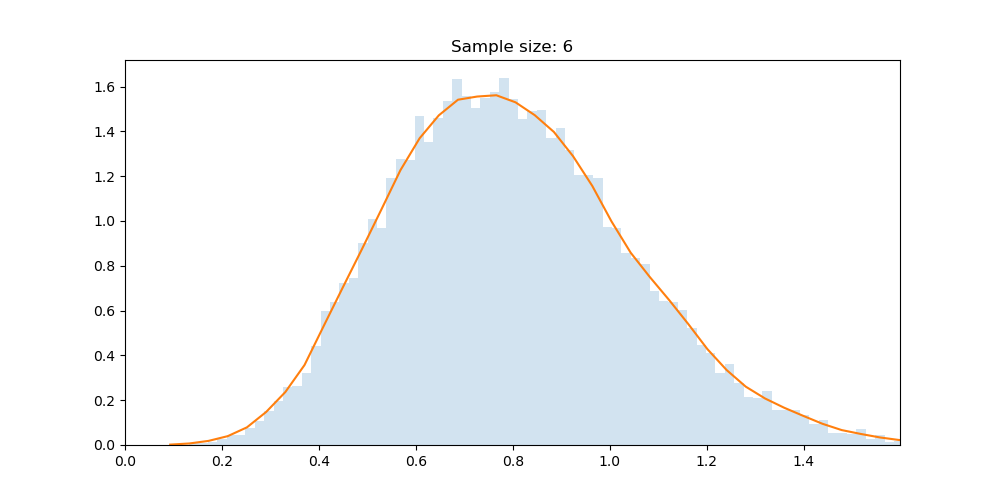

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

def plot_sample_dist(sample_size, n=pop_size*2):
    sample_dist = np.random.choice(skewed_data, size=(n, sample_size)).mean(axis=1)
    sample_dist_std = skewed_data.std() / math.sqrt(sample_size)
    
    # Get KDE plot for the distribution (for illustrative purposes)
    xs = np.linspace(sample_dist.min(), sample_dist.max(), 50)
    density = gaussian_kde(sample_dist)(xs)
    
    # Get normal distribution (for comparison purposes)
    #x_norm = np.linspace(norm.ppf(0.001, loc=skewed_data.mean(), scale=sample_dist_std), norm.ppf(0.999, loc=skewed_data.mean(), scale=sample_dist_std), 1000)
    #norm_pdf = norm.pdf(x_norm, loc=skewed_data.mean(), scale=sample_dist_std)

    # Create plot
    y_min = 0
    y_max = 4
    #deciles = np.quantile(skewed_data, 10)
    #print(deciles)
    x_min = 0
    x_max = sample_dist.mean() * 2
    ax.clear()
    ax.hist(sample_dist, density=True, histtype='stepfilled', alpha=0.2, bins=100, label=f'Sample size: ${sample_size}')
    ax.plot(xs, density)
    ax.set(title=f'Sample size: {sample_size}')
    #ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    
    return im.AxesImage(ax)

a = anim.FuncAnimation(fig, plot_sample_dist, frames=range(1, 31), interval=500)
a.save('output.mp4')